Import necessary packages: Numpy, Pandas, matplotlib

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

Note that the downside of using colab is that the resources such as GPUs and CPUs are given to you only temporarily. This means something in between 30-120min. Your code will be saved but variables and computed data stored in the memory reset. If you don't have a google account you will have to upload the datasets zip.train and zip.test after the CPU was reset. This exercise does not require a GPU and will also work on your own device, if you don't want to use colab.

In [3]:
path_to_train = './Data/zip.train'
path_to_test = './Data/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

First of all: it's always good to analyse what you are working with. So print out some information about the dataset until you understand how it is structured:

In [4]:
print(X_train[0])
print(X_train.shape)
print(y_train.shape)
print(y_train[0])
print(X_train[0].reshape(16,16).shape)  
#print(X_test[5])

[-1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.631  0.862 -0.167
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -0.992  0.297  1.     0.307 -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.41   1.
  0.986 -0.565 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -0.683  0.825  1.     0.562 -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.938  0.54
  1.     0.778 -0.715 -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.     0.1    1.     0.922 -0.439 -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.257
  0.95   1.    -0.162 -1.    -1.    -1.    -0.987 -0.714 -0.832 -1.
 -1.    -1.    -1.    -1.    -0.797  0.909  1.     0.3   -0.961 -1.
 -1.    -0.55   0.485  0.996  0.867  0.092 -1.    -1.    -1.    -1.
  0.278  1.     0.877 -0.824 -1.    -0.905  0.145  0.977  1.     1.
  1.     0.99  -0.745 -1.    -1.    -0.9

The following code helps you visualizing elements of the dataset. Try to understand how this works. This will probably be handy for other exercises as well.

In [5]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) #(1-sample_digits[i].reshape((16, 16)))/2*255
        plt.imshow(img, cmap='gray')
        plt.axis('off')


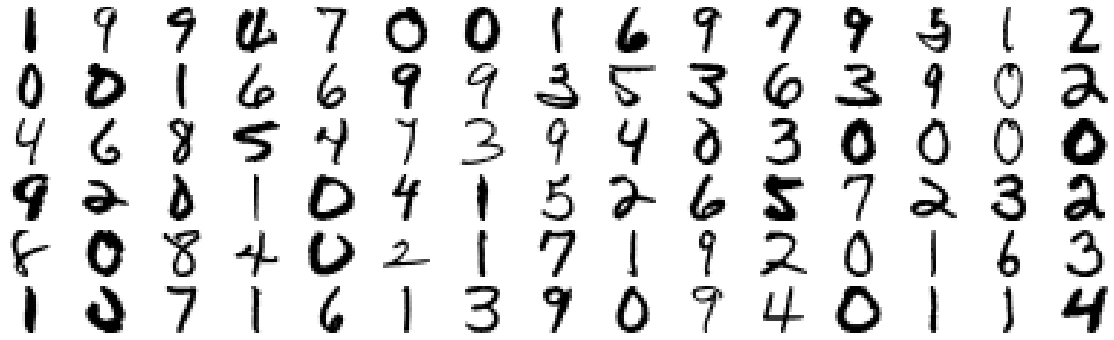

In [6]:
show_numbers(X_train)

Implement the KNearestNeighbors class.

a) Print out the accuracy.

b) Using Matplotlib, plot some of the numbers that are classified incorrectly.

c) Which k is optimal for the accuracy?

d) What are advantages and disadvantages for the k-NN-Classifier?

In [7]:
class KNearestNeighbors():
    '''
    Think about defining more functions that will help you building this algorithm.
    Optimally, one that takes in k and a test image as a parameter.
    '''
    def predict(self, X_test, k):       # As suggested, a function that takes in k and a test image as a parameter.
        predict_results = []
        for i in X_test:
            squared_distances = self.squared_euclidean_distance(X_train, i)
            indices = np.argpartition(squared_distances, k)[:k]   # get the indices of k values with smaller distances
            answer_indices = (self.y[indices])       # get the value of the label corresponding to index
            #print(answer_indices)
            list = answer_indices.tolist()           # turn numpy array into a normal list to use count
            majority = max(list, key=list.count)     # get the value with the most occurrences
            #print(majority)
            predict_results += [majority]            # add it to a result list
        return(predict_results)
                    
    def fit(self, x, y):     #fit X_train, y_train together
        self.X = x
        self.y = y
            
    def squared_euclidean_distance(self, x_1, x_2):
        return np.sum((x_1-x_2)**2, axis = 1)

    def correctness(self, right_answer, predict_result):
        return np.mean(right_answer == predict_result)
    
kNN = KNearestNeighbors()
squared_distances = kNN.squared_euclidean_distance(X_train, X_test[0])
print(squared_distances)              

[347.493594 401.407206 223.70639  ... 244.63911  388.289621 243.791766]


## Task a

In [8]:
kNN.fit(X_train, y_train)
prediction1 = kNN.predict(X_test, 1)
print(kNN.correctness(y_test, prediction1))

0.9436970602889886


## Task c
As the result shows, k=3 is the most ideal value

In [9]:
kNN.fit(X_train, y_train)

prediction1 = kNN.predict(X_test, 1)     # k=1
prediction2 = kNN.predict(X_test, 2)
prediction3 = kNN.predict(X_test, 3)
prediction4 = kNN.predict(X_test, 4)
prediction5 = kNN.predict(X_test, 5)
prediction6 = kNN.predict(X_test, 6)

#print(prediction)

print(kNN.correctness(y_test, prediction1))
print(kNN.correctness(y_test, prediction2))
print(kNN.correctness(y_test, prediction3))
print(kNN.correctness(y_test, prediction4))
print(kNN.correctness(y_test, prediction5))
print(kNN.correctness(y_test, prediction6))


0.9436970602889886
0.9436970602889886
0.9461883408071748
0.9456900847035377
0.9436970602889886
0.942700548081714


## Task b

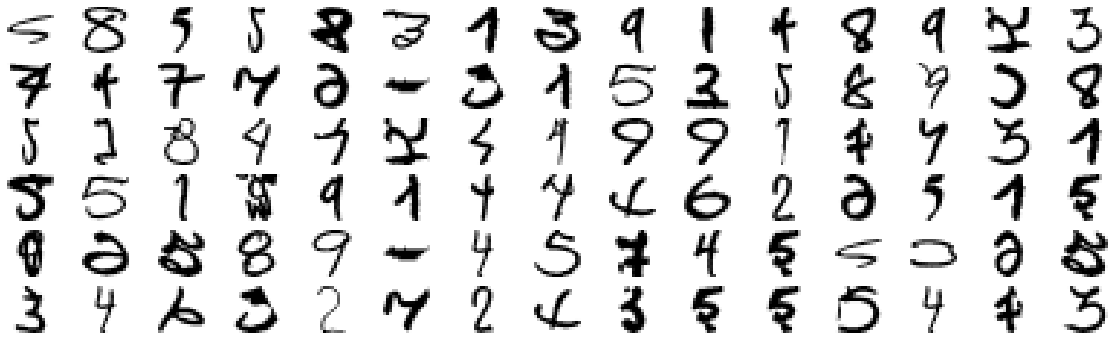

In [10]:
wrong = X_test[(prediction3 != y_test)]   # numbers that are classified incorrectly
show_numbers(wrong)

## Task 4
### __Advantages:__
1. kNN Classifier can be used for classification and regression problems.
2. kNN is also available for non-linear classification
3. The complexity of training data with kNN is lower than some other algorithms like SVM, just O(n)
4. It's quite suitable for kNN classifier when the data in some fields are distributed with overlaps.

### __Disadvantages:__
1. The amout of computation is huge, when there are lots of features.
2. The prediction can be imprecise when the data samples are not distributed balancely.
3. It's not that efficient when the #data is large.